<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px">

## ARIMA and Timeseries Modeling

Week 9 | Lesson 3.1

---

## Opening: What are Time Series Models?

So far, we focused on exploring time-series data and common statistics for time-series analysis. 

In this class, we'll advance those techniques to show how to predict or forecast from time series data.

## Agenda:

- Training/test splits.
- Stationarity and differencing.
- AR Models.
- MA Models.
- ARIMA Models.
- ACF and PACF plots.

## Training and Test set.

- We can't randombly sample our data to create a train/test split.

- Our training and testing sets need to be ordered by time.

## Stationarity and differencing.

_A stationary time series is one whose properties do not depend on the time at which the series is observed_

- The long running mean and variance are constant if the TS is stationary.
- TS with trends or seasonality are NOT stationary.
- TS with cyclic behaviour can be stationary (as cycles are not of fixed length.

## Why care about stationarity?

- Most statistical forecasting methods are based on the assumption that the time series can be rendered approximately stationary (i.e., "stationarized") through the use of mathematical transformations. 

- A stationarized series is relatively easy to predict: you simply predict that its statistical properties will be the same in the future as they have been in the past!

What quantities are we typically interested in when we perform statistical analysis on a time series? We want to know:

Its expected value,
Its variance, and
The correlation between values s periods apart for a set of s values.
How do we calculate these things? Using a mean across many time periods.

The mean across many time periods is only informative if the expected value is the same across those time periods. If these population parameters can vary, what are we really estimating by taking an average across time?

(Weak) stationarity requires that these population quantities must be the same across time, making the sample average a reasonable way to estimate them.

_Stationary time series will have no predictable patterns in the long term._

![](./assets/images/stationary.png)

### Which of the series was stationary?

- Obvious seasonality rules out (d), (h) and (i).

- Trend rules out series (a), (c), (e), (f) and (i).

- Increasing variance also rules out (f).

- Only (b) and (g) are stationary series.

## Differencing

- By computing the difference between consecutive observations we can make a series stationary. (a and b in the previous image correspond the the Down Jones and the differnce in values respectively).

- Logarithms can help stabilize the variance of a time series.

## ACF plots.

- ACF plots are also useful for identifying non-stationary time series. 
- In stationary time series ACF will drop to zero relatively quickly.

![](./assets/images/acfstationary.png)

## ARIMA MODELS.

Throughout this lesson, we are going to build up to the **ARIMA** time-series model. 

This models combines the ideas of differencing and two models we will see below: **AR** or autoregressive models and **MA** or moving average models.

_First lets introduce the data set we are going to be using_

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import statsmodels as sm

sns.set_style('whitegrid')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
data = pd.read_csv('assets/datasets/rossmann.csv', skipinitialspace=True)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head(2)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1


In [4]:
# Filter to Store 1
store1_data = data[data.Store == 1]

# Filter to open days
store1_open_data = store1_data[store1_data.Open==1]

store1_open_data.head(2)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-30,1,4,5020,546,1,1,0,1


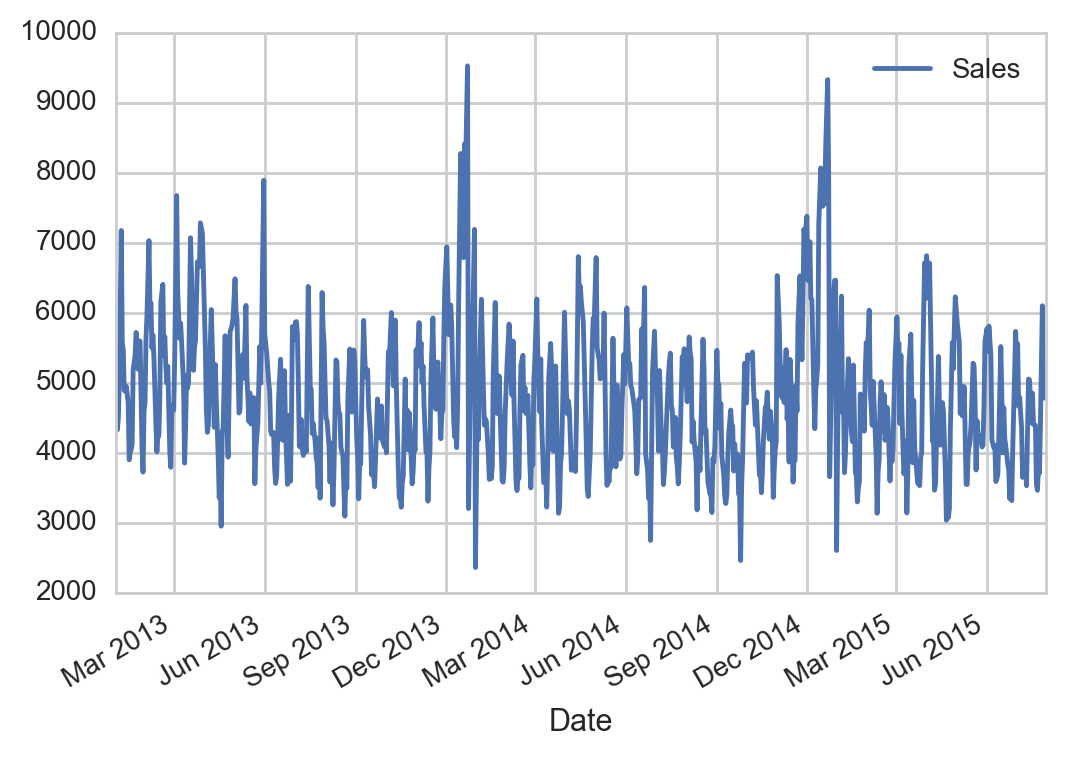

In [5]:
# Plot the sales over time
store1_open_data[['Sales']].plot()

---

## Autoregressive (AR) models

Autoregressive (AR) models use data from previous time-points to predict the next time-point. These are essentially regression models where the predictors are previous timepoints of the outcome.

Typically, AR models are denoted `AR(p)`, where _p_ indicates the number of previous time points to incorporate. `AR(1)` is the most common.

In an autoregressive model we learn regression coefficients on the features that are the previous _p_ values.

### $$y_i = c + \beta_1 * y_{i-1} + \beta_2 * y_{i-2}\ +\ ...\ +\ \beta_p * y_{i-p}\ +\ \epsilon$$



As with other linear models, interpretation becomes more complex as we add more factors; as we go from AR(1) to AR(2) we begin to have significant _multi-collinearity_.

Recall, _autocorrelation_ is the correlation of a value with itself. A timeseries with high autocorrelation implies that the data is highly dependent on previous values and an autoregressive model would perform well.

Autoregressive models are useful for learning falls or rises in our series. Typically, this model type is useful for small-scale trends, such as an increase in demand that will gradually increase the series.

-0.127325143391
-0.0347871557079


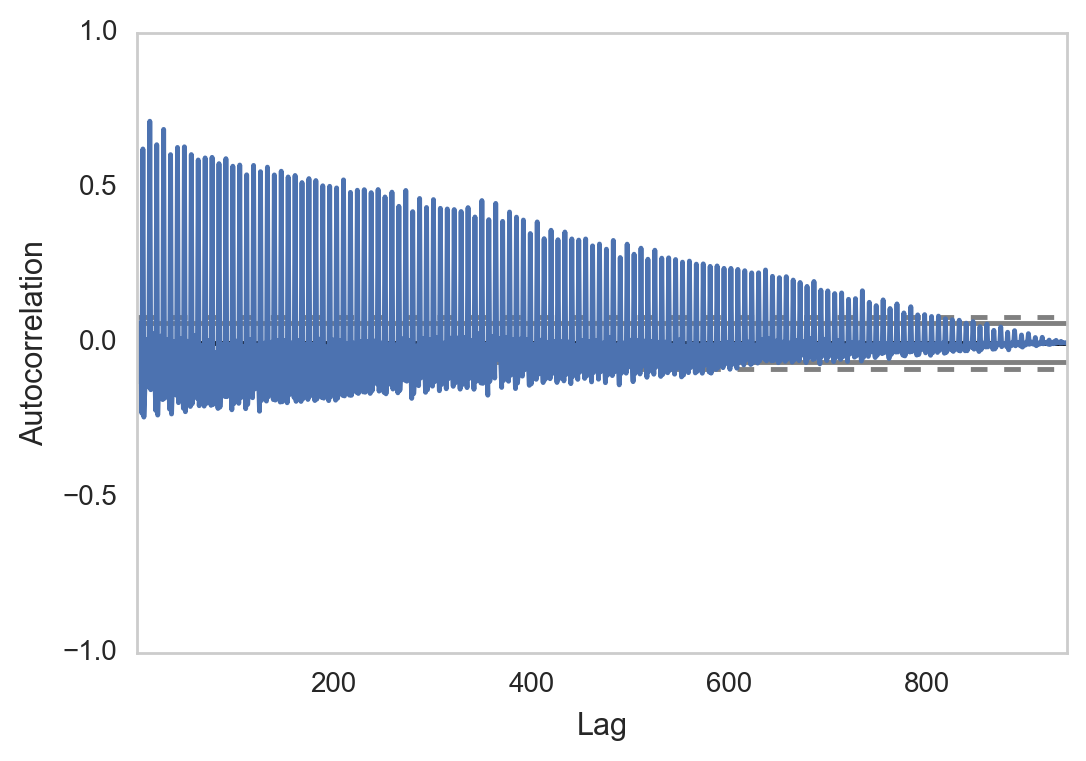

In [6]:
# Lets check for correlation in the sales dataset:
from pandas.tools.plotting import autocorrelation_plot

print store1_data.Sales.autocorr(lag=1)
print store1_data.Sales.autocorr(lag=2)

autocorrelation_plot(store1_data.Sales)

Why do we have a spike at 7?


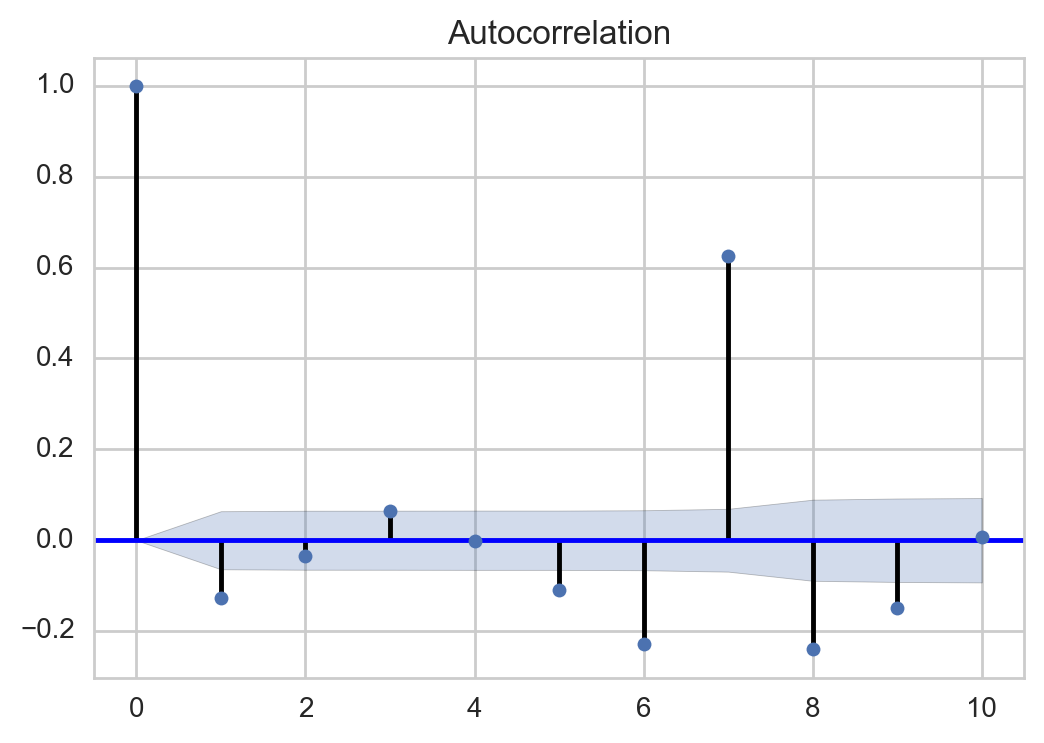

In [7]:
# Lets plot the ACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(store1_data.Sales, lags=10)
print "Why do we have a spike at 7?"

## PACF (partial autocorrelation function) 

Is essentially the autocorrelation of a signal with itself at different points in time, with linear dependency with that signal at shorter lags removed, as a function of lag between points of time. 

Informally, the partial correlation between x(t) and x(t+h) is the autocorrelation between x(t) and x(t+h) without the contribution of x(t+1),x(t+2),....,x(t+h−1).

Or, if we have x1, x2, x3, PACF is that portion of the correlation between x1 and x3, which is not explained by the correlation between x3 in x2.

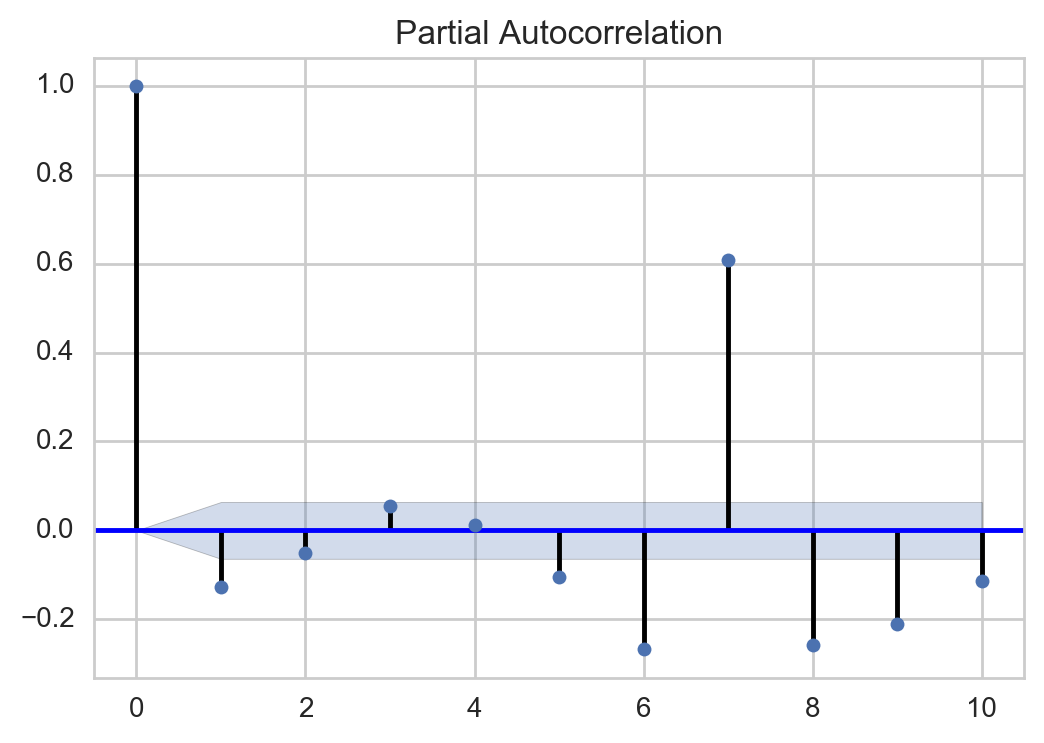

In [8]:
plot_pacf(store1_data.Sales, lags=10)
print ""

In [9]:
#Now let's try to fit a AR model with statsmodels.
ar2 = sm.tsa.arima_model.AR(data['Sales']).fit(maxlag=2, trend="nc")
ar2.params

L1.Sales    0.476287
L2.Sales    0.450183
dtype: float64

---

## Moving Average (MA) models

Rather than use past values of the forecast variable in a regression, a moving average model uses past forecast errors in a regression-like model.

### $$y_i = mean + \beta_1 * \epsilon_i + ... \beta_q * \epsilon_q$$

where e(i) is white noise. We refer to this as an MA(q) model. Of course, we do not observe the values of e(i), so it is not really regression in the usual sense.

Notice that each value of y(i) can be thought of as a weighted moving average of the past few forecast errors.

MA models require a more complex fitting procedure where we iteratively fit a model, compute the errors, and then refit, over and over again.

MA includes the mean of the time series. The behavior of the model is therefore characterized by random jumps around the mean value.

In an `MA(1)` model, there is one coefficient on the error of our previous prediction impacting our estimate for the next value in the timeseries.

---

## ARMA models

The final stepping stone before **ARIMA** models are **ARMA** models.

_ARMA_ models combine the autoregressive models and moving average models. We combine both, parameterizing the behavior of the model with `p` and `q` terms corresponding to the `AR(p)` model and `MA(q)` model.

Autoregressive models slowly incorporate changes in preferences, tastes, and patterns. Moving average models base their prediction not on the prior value but the prior error, allowing us to correct sudden changes based on random events - supply, popularity spikes, etc.


In [10]:
from statsmodels.tsa.arima_model import ARMA

store1_sales_data = store1_open_data[['Sales']][:len(store1_open_data)/2].astype(float)
arma10 = ARMA(store1_sales_data, (1, 0)).fit()
arma10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  390
Model:                     ARMA(1, 0)   Log Likelihood               -3111.422
Method:                       css-mle   S.D. of innovations            704.950
Date:                Wed, 07 Dec 2016   AIC                           6228.845
Time:                        10:46:02   BIC                           6240.743
Sample:                    07-31-2015   HQIC                          6233.562
                         - 04-15-2014                                         
===============================================================================
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const        4693.7372    127.212     36.897      0.000      4444.407  4943.068
ar.L1.Sales     0.7212      0.035     20.560      0.000         0.652     0.790
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3866           +0.0000j            1.3866            0.0000
-----------------------------------------------------------------------------
"""

_The previous model was the equivalent of a AR(1) model, since the order for MA is zero._


In [12]:
# We can now try fitting a AR(2) model, in which we are modeling a day of sales based
# on the values for the previous two days.
arma20 = ARMA(store1_sales_data, (2, 0)).fit()
arma20.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  390
Model:                     ARMA(2, 0)   Log Likelihood               -3111.421
Method:                       css-mle   S.D. of innovations            704.947
Date:                Wed, 07 Dec 2016   AIC                           6230.842
Time:                        10:55:50   BIC                           6246.707
Sample:                    07-31-2015   HQIC                          6237.131
                         - 04-15-2014                                         
===============================================================================
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const        4693.9148    127.577     36.793      0.000      4443.868  4943.962
ar.L1.Sales     0.7192      0.051     14.224      0.000         0.620     0.818
ar.L2.Sales     0.0027      0.051      0.054      0.957        -0.097     0.102
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3831           +0.0000j            1.3831            0.0000
AR.2         -264.2619           +0.0000j          264.2619            0.5000
-----------------------------------------------------------------------------
"""

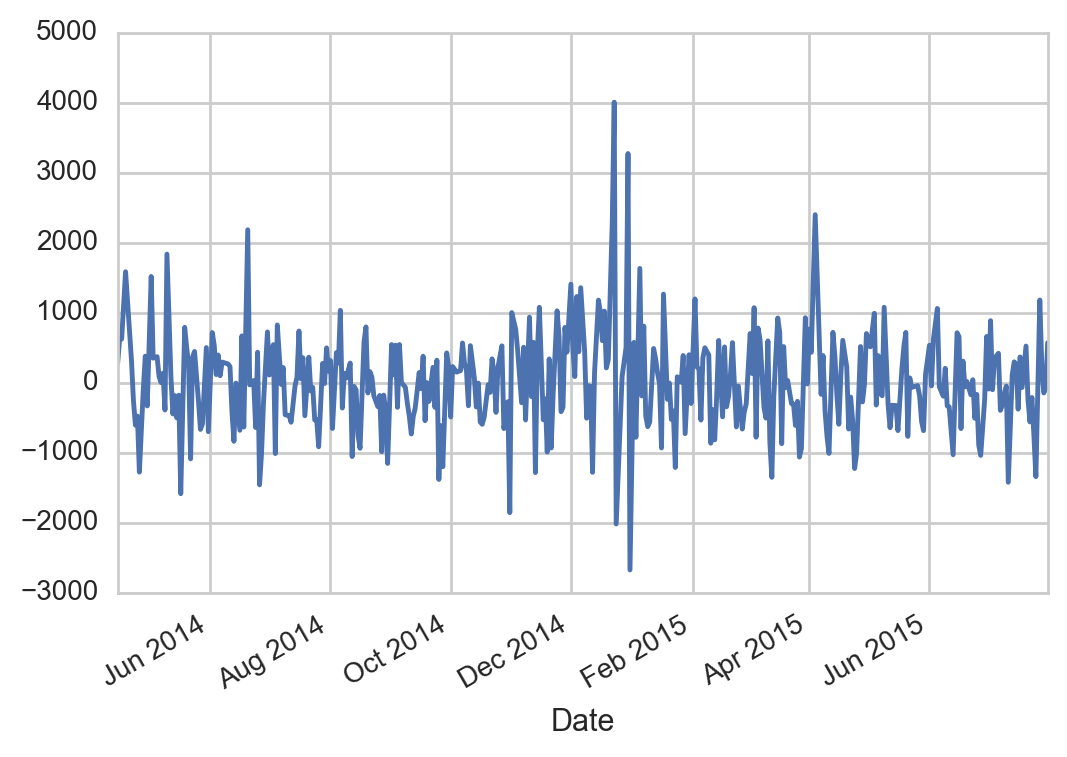

In [144]:
# Now we check the residuals of our model to see how well our model is capturing the 
# phenomena. 

# Ideally we don't want to see any pattern in the residual plot.
arma20.resid.plot()

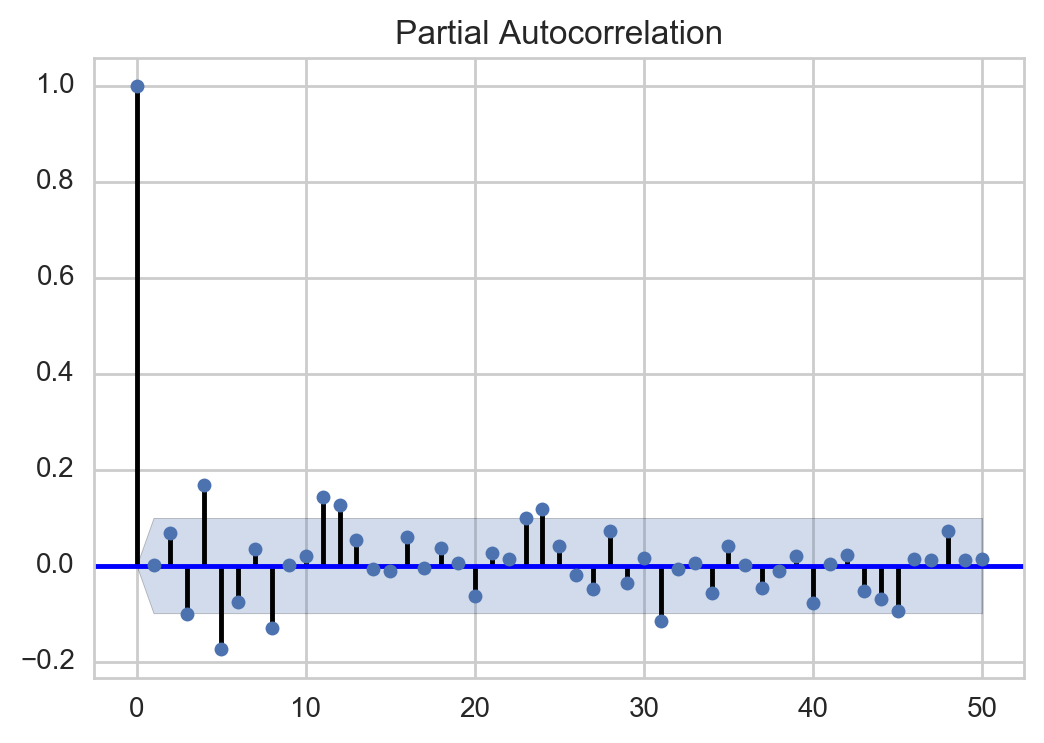

In [148]:
# By plotting the PACF of the residuals we can check if they are independent.
plot_pacf(model.resid, lags=50)
print ""

In [13]:
# We can also fit a full ARMA model, adding a degree to the MA component.
arma11 = ARMA(store1_sales_data, (1, 1)).fit()
arma11.summary()

# The coefficients here are 0.72 for the AR component and -0.03 for the MA component. 
# The AR coefficient is the same as before (decreasing values) and 
# the MA component is fairly small (which we should have expected from the 
# autocorrelation plots).

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  390
Model:                     ARMA(1, 1)   Log Likelihood               -3111.421
Method:                       css-mle   S.D. of innovations            704.948
Date:                Wed, 07 Dec 2016   AIC                           6230.843
Time:                        10:59:58   BIC                           6246.707
Sample:                    07-31-2015   HQIC                          6237.131
                         - 04-15-2014                                         
===============================================================================
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const        4693.8213    127.502     36.814      0.000      4443.921  4943.721
ar.L1.Sales     0.7226      0.046     15.649      0.000         0.632     0.813
ma.L1.Sales    -0.0030      0.063     -0.048      0.962        -0.126     0.120
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3838           +0.0000j            1.3838            0.0000
MA.1          332.9682           +0.0000j          332.9682            0.0000
-----------------------------------------------------------------------------
"""

---

## Autoregressive Ingegrated Moving Average (ARIMA) models

ARIMA is just like the `ARMA(p, q)` model, but instead of predicting the value of the series it predicts the _differenced_ series or changes in the series. The order of differencing is set by an _d_ term as in `ARIMA(p, d, q)`, or alternatively you can just fit an `ARMA(p, q)` model on a differenced timeseries.

Recall the pandas `diff` function. This computes the difference between two consecutive values. In an ARIMA model, we attempt to predict this difference instead of the actual values.

### $$y_t - y_{(t-1)} = ARMA(p, q)$$

This handles the stationarity assumption: instead of detrending or differencing manually, the model does this via the differencing term.

For a higher value of _d_, for example, d=2, an `ARIMA(p, 2, q)` model is equivalent to:

    diff(diff(y)) = ARMA(p, q)

The order of differencing is the same as applying the `diff` function _d_ times.

Compared to an ARMA model, ARIMA models _do not rely on the underlying series being stationary._ The differencing operation can _convert_ the series to one that is stationary.

Since ARIMA models automatically include differencing, we can use this on a broader set of data without assumptions of a constant mean.

In [163]:
from statsmodels.tsa.arima_model import ARIMA

# We can see that this model in fact simplifies automatically to an ARMA model.
arima101 = ARIMA(store1_sales_data, (1, 0, 1)).fit()
arima101.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  390
Model:                     ARMA(1, 1)   Log Likelihood               -3111.421
Method:                       css-mle   S.D. of innovations            704.948
Date:                Tue, 06 Dec 2016   AIC                           6230.843
Time:                        22:28:52   BIC                           6246.707
Sample:                    07-31-2015   HQIC                          6237.131
                         - 04-15-2014                                         
===============================================================================
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const        4693.7143    127.501     36.813      0.000      4443.816  4943.612
ar.L1.Sales     0.7226      0.046     15.649      0.000         0.632     0.813
ma.L1.Sales    -0.0030      0.063     -0.048      0.962        -0.126     0.120
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3838           +0.0000j            1.3838            0.0000
MA.1          332.9865           +0.0000j          332.9865            0.0000
-----------------------------------------------------------------------------
"""

In [168]:
# Let's remove the moving average component since it wasn't particularly useful before.
# Also, lets add the differencing parameter.
# Now this is equivalent to a AR(1) model on the differenced data.
arima110 = ARIMA(store1_sales_data, (1, 1, 0)).fit()

# Note the value of the coeffient.
arima110.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  389
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -3128.216
Method:                       css-mle   S.D. of innovations            751.989
Date:                Tue, 06 Dec 2016   AIC                           6262.432
Time:                        22:29:47   BIC                           6274.323
Sample:                    07-30-2015   HQIC                          6267.146
                         - 04-15-2014                                         
=================================================================================
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const             2.5494     33.388      0.076      0.939       -62.890    67.989
ar.L1.D.Sales    -0.1423      0.050     -2.839      0.005        -0.241    -0.044
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -7.0268           +0.0000j            7.0268            0.5000
-----------------------------------------------------------------------------
"""

In [169]:
# We can compute the lag 1 auto correlation of the difference series and see if they match!
store1_sales_data.Sales.diff(1).autocorr(1) 

-0.14264855627898301

_Another example_

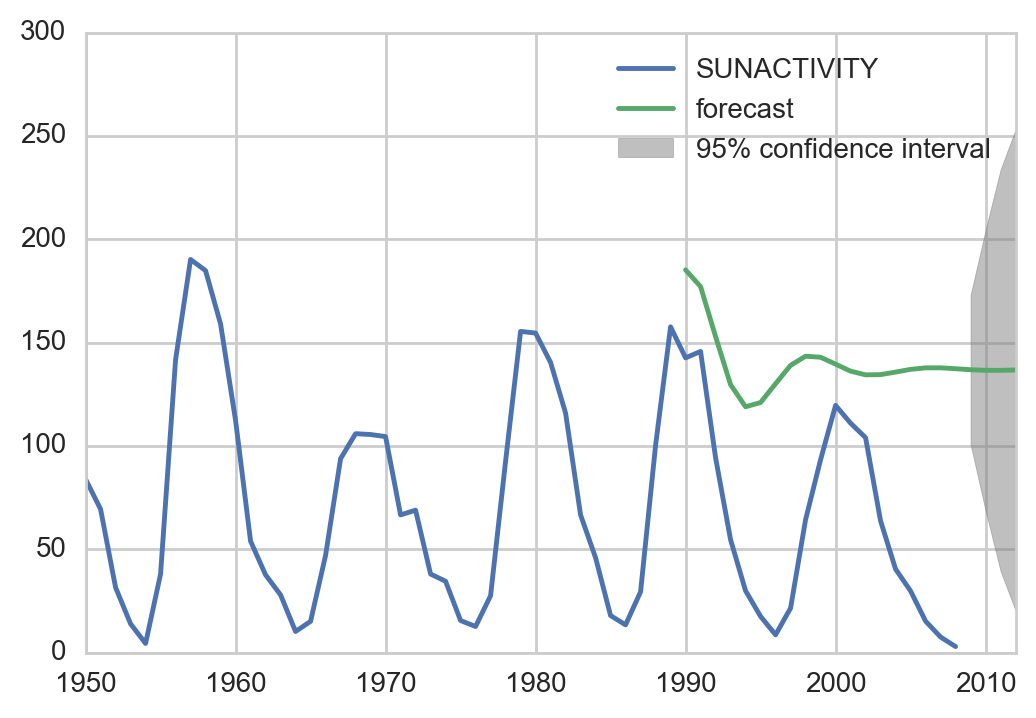

In [16]:
# Another worked out example, using the sunspots dataset.
from statsmodels.tsa.arima_model import ARMA
import statsmodels as sm
import matplotlib.pyplot as plt
import pandas as pd

dta = sm.datasets.sunspots.load_pandas().data[['SUNACTIVITY']]
dta.index = pd.DatetimeIndex(start='1700', end='2009', freq='A')
res = sm.tsa.arima_model.ARIMA(dta, (3, 1, 0)).fit()
fig, ax = plt.subplots()
ax = dta.ix['1950':].plot(ax=ax)
fig = res.plot_predict('1990', '2012', dynamic=True, ax=ax,
                        plot_insample=False)
plt.show()

Unfortunately ARIMA models quickly converge to the mean of the TS. 